In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Actions to be performed:
* Data Exploration
* Data Preparation
* Ingredients used per Region
* Finding out flavour profile considering ingredients used
* Shortest meal prep + cook time per course

In [3]:
#importing data
df = pd.read_csv('D:\Shweta\Python\Indian Cuisine\indian_food.csv')
df.head()


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
#extracting relevant information about all attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:
#information about numeric attributes
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [6]:
#switching ingredients from a single string to list of strings
ingredients = []

for row in range(len(df)):
    ing = df['ingredients'][row].replace(" ", "").split(',')
    ingredients.append(ing)
    
df['ingredients'] = ingredients
df.head



<bound method NDFrame.head of                name                                        ingredients  \
0        Balu shahi                   [Maidaflour, yogurt, oil, sugar]   
1            Boondi                           [Gramflour, ghee, sugar]   
2    Gajar ka halwa     [Carrots, milk, sugar, ghee, cashews, raisins]   
3            Ghevar  [Flour, ghee, kewra, milk, clarifiedbutter, su...   
4       Gulab jamun  [Milkpowder, plainflour, bakingpowder, ghee, m...   
..              ...                                                ...   
250       Til Pitha             [Glutinousrice, blacksesameseeds, gur]   
251         Bebinca  [Coconutmilk, eggyolks, clarifiedbutter, allpu...   
252          Shufta  [Cottagecheese, drydates, driedrosepetals, pis...   
253       Mawa Bati  [Milkpowder, dryfruits, arrowrootpowder, allpu...   
254          Pinaca  [Brownrice, fennelseeds, gratedcoconut, blackp...   

           diet  prep_time  cook_time flavor_profile   course  \
0    vegetarian 

In [7]:
#finding out null value if present
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

Here we found out that region has one null value.
Hence to get rid of null value, we have to find what could be the possible value to replace a null value.
Corrsponding state for null value is 'Uttar Pradesh'. All other uttar pradesh state has region as 'North'.
Hence we are assuming that null value can be replaced with 'North'.

In [8]:
df[df['region'].isnull()]
df[df['state'] == 'Uttar Pradesh']
df['region']=df['region'].replace(np.nan, 'North')


In [9]:
#Checking unique values for each attribute
print(df['flavor_profile'].unique())
print(df['course'].unique())
print(df['state'].unique())
print(df['region'].unique())
print(df['diet'].unique())

['sweet' 'spicy' 'bitter' '-1' 'sour']
['dessert' 'main course' 'starter' 'snack']
['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' '-1' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']
['East' 'West' 'North' '-1' 'North East' 'South' 'Central']
['vegetarian' 'non vegetarian']


Few things needs to be done in order to prepare data for analysis:
* Both the flavor profile, state and region columns has a -1 value, I'll change it to 'others' for now since I don't know what might be the correct entry.
* There are also -1 values in the preparation time and cooking time columns, I'll change them to 0 so they are easier to deal with.

In [10]:
df['flavor_profile'] = df['flavor_profile'].replace('-1','Others')
df['state'] = df['state'].replace('-1','Others')
df['region'] = df['region'].replace('-1','Others')

print(df['flavor_profile'].unique())
print(df['state'].unique())
print(df['region'].unique())

['sweet' 'spicy' 'bitter' 'Others' 'sour']
['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' 'Others' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']
['East' 'West' 'North' 'Others' 'North East' 'South' 'Central']


In [11]:
df['cook_time'] = df['cook_time'].replace(-1, 0)
df['prep_time'] = df['prep_time'].replace(-1,0)
print(df.describe())



        prep_time   cook_time
count  255.000000  255.000000
mean    31.223529   34.639216
std     72.502844   48.185452
min      0.000000    0.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


After data is ready for analysis I will start with 
* Ingredients used per Region

In [12]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"[Maidaflour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"[Gramflour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"[Flour, ghee, kewra, milk, clarifiedbutter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"[Milkpowder, plainflour, bakingpowder, ghee, m...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [13]:

#creating empting lists for all region which will be later filled with ingredients used in that particular region
East = []
West = []
North = []
Others = []
NorthEast = []
South = []
Central = []

# Filling the lists
for row in range(len(df)):
    if df['region'][row] == 'East':
        East.extend(df['ingredients'][row])
    if df['region'][row] == 'West':
        West.extend(df['ingredients'][row])
    if df['region'][row] == 'North':
        North.extend(df['ingredients'][row])
    if df['region'][row] == 'North East':
        NorthEast.extend(df['ingredients'][row])
    if df['region'][row] == 'South':
        South.extend(df['ingredients'][row])
    if df['region'][row] == 'Central':
        Central.extend(df['ingredients'][row])
    if df['region'][row] == 'Others':
        Others.extend(df['ingredients'][row])

# Series which include each unique ingredient value
all_ingredient = pd.Series(East+West+North+Others+NorthEast+South+Central).unique()

# Creating empty lists that will store the number of times each ingredient used
EastC = []
WestC = []
NorthC = []
OthersC = []
NorthEC = []
SouthC = []
CentralC = []

# Filling the lists
for ingredient in all_ingredient:
    EastC.append(East.count(ingredient))
    WestC.append(West.count(ingredient))
    NorthC.append(North.count(ingredient))
    OthersC.append(Others.count(ingredient))
    NorthEC.append(NorthEast.count(ingredient))
    SouthC.append(South.count(ingredient))
    CentralC.append(Central.count(ingredient))

# Creating the dataset with the values collected
ingredient_per_region = pd.DataFrame({'East': EastC, 'West': WestC, 'North': NorthC, 'Others': OthersC, 'North East': NorthEC,
                               'South': SouthC, 'Central': CentralC}, index=all_ingredient) 

# Adding a column with the sum of all the other columns
ingredient_per_region['Sum'] = (ingredient_per_region['East'] + ingredient_per_region['West'] + ingredient_per_region['North'] + ingredient_per_region['Others'] 
                        + ingredient_per_region['North East'] + ingredient_per_region['South'] + ingredient_per_region['Central'])

ingredient_per_region.head()

,East,West,North,Others,North East,South,Central,Sum
Maidaflour,1,0,0,0,0,1,0,2
yogurt,1,1,2,0,0,0,0,4
oil,2,2,1,0,0,0,0,5
sugar,14,12,4,5,2,7,0,44
Milkpowder,1,0,0,0,0,0,1,2


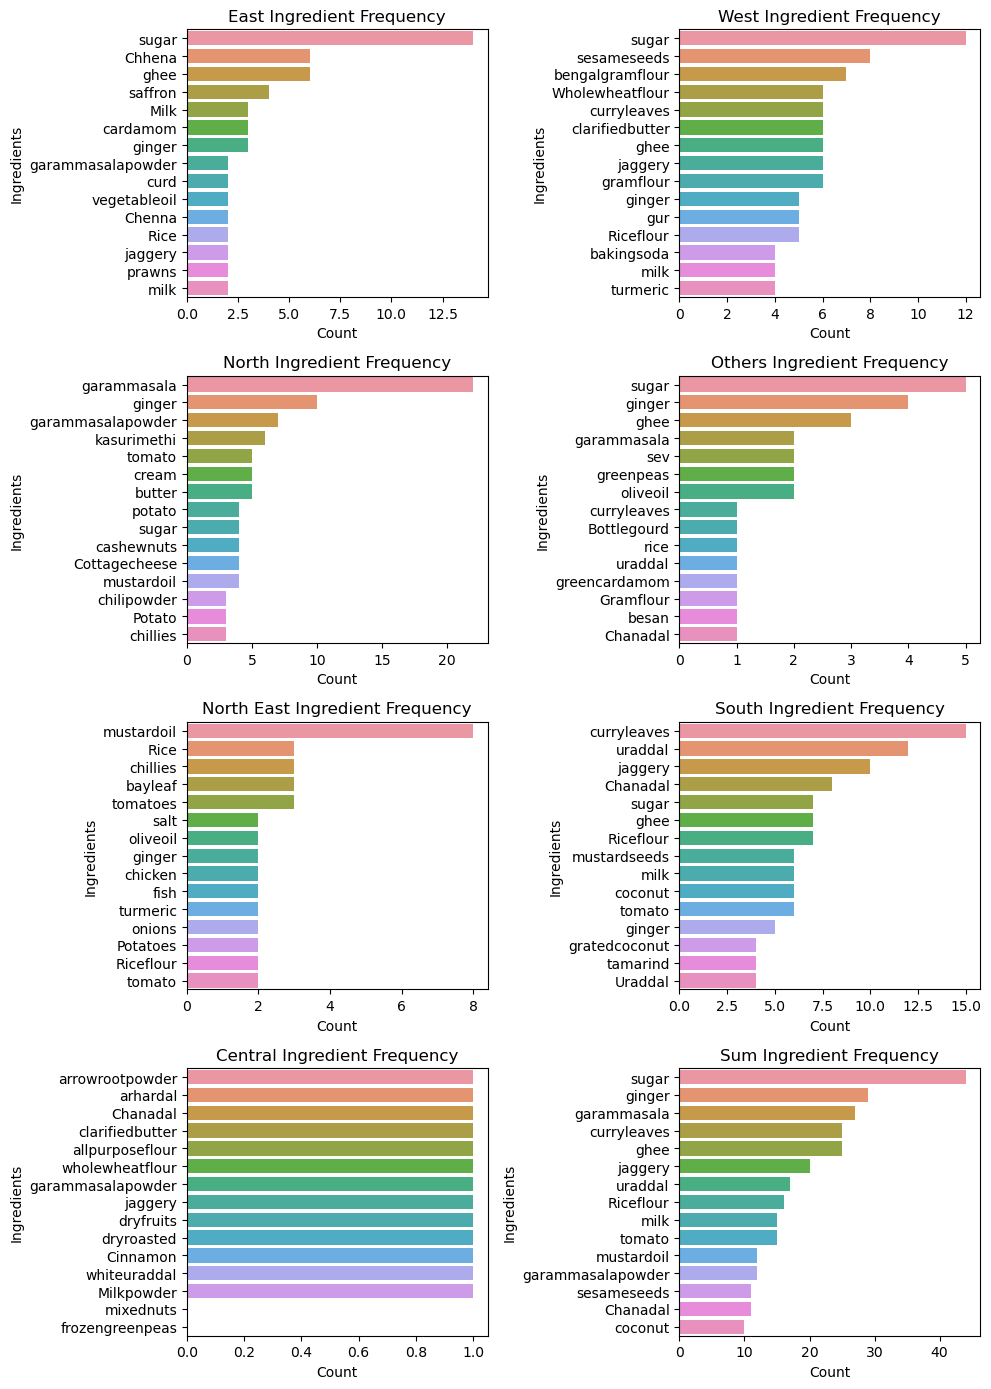

In [14]:
# Plotting the graph
plt.figure(figsize=(10,14), dpi = 100)

for n, region in enumerate(ingredient_per_region.columns):
    ord = ingredient_per_region.sort_values([region], ascending=False)[0:15]
    plt.subplot(4, 2, n+1)
    sns.barplot(x=ord[region], y=ord.index)
    plt.xlabel('Count')
    plt.ylabel('Ingredients')
    plt.title(f'{region} Ingredient Frequency')
    
plt.tight_layout()
plt.show()

This graph only shows amount of each ingredient used in particular region but it does not show which courses are prepared in that region.

We can assume from above plot that East and West region has a maximum consumption of sugar hence people in that region might be having a sweet tooth.
Whereas in north india, we can conclude from the graph that use of oil specially musturd oil is very high compared to other regions, excluding this, north indians have pretty good balaced diet habits.
In South india, use of curry leaves and urad daal is prominent.

Let's find out which type of courses are prepared in what frequency in all regions.



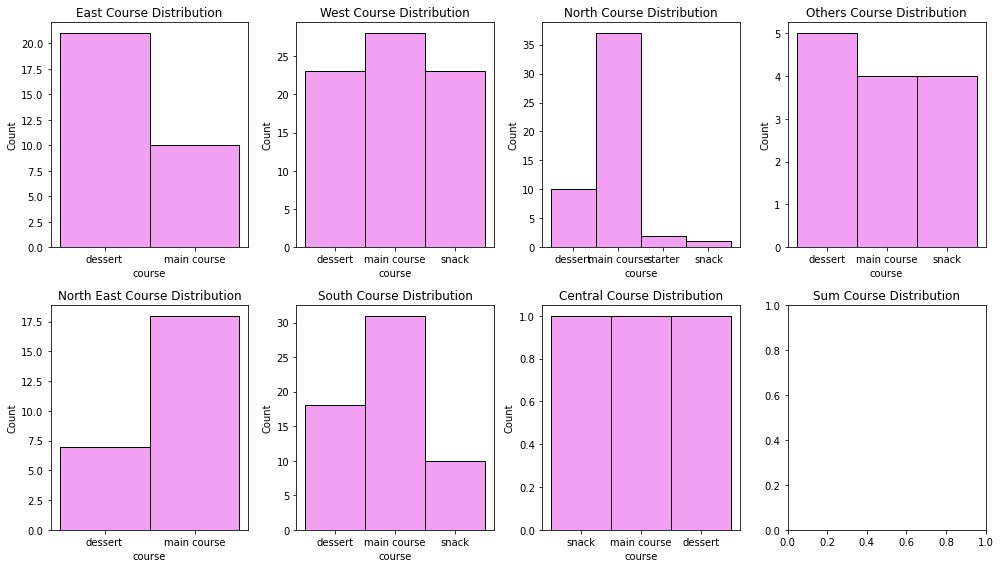

In [15]:
plt.figure(figsize=(14,8))

for n, region in enumerate(ingredient_per_region.columns):
   
    plt.subplot(2, 4, n+1)
    sns.histplot(df[df['region'] == region]['course'], color = 'Violet')
    plt.title(f'{region} Course Distribution')
    #plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

According to this plot, we can conclude that, regions which has high consumption of sugar makes many dessert dishes that means we can say, Indian dessert's main component is sugar.

* Finding out flavour profile considering ingredients used

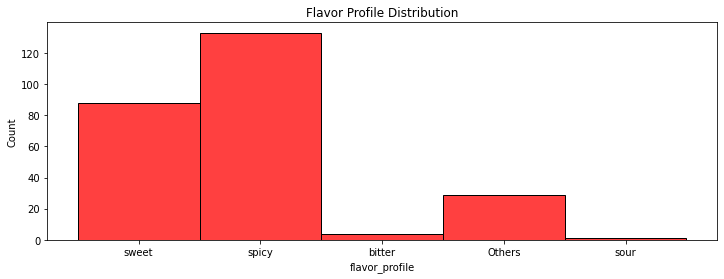

In [16]:
plt.figure(figsize=(12,4))
sns.histplot(df['flavor_profile'], color= 'red')
plt.title('Flavor Profile Distribution')

plt.show()

From this basic plot of flavor profile, we can see most favorite flavor in India Cuisine is sweet and spicy.
We can analyse flavor profile in furthur detail using a similar format as of our first analysis(Ingredients used per region)

In [17]:
Sweet = []
Spicy = []
Bitter = []
Others = []
Sour = []

for row in range(len(df)):
    if df['flavor_profile'][row] == 'sweet':
        Sweet.extend(df['ingredients'][row])
    if df['flavor_profile'][row] == 'spicy':
        Spicy.extend(df['ingredients'][row])
    if df['flavor_profile'][row] == 'bitter':
        Bitter.extend(df['ingredients'][row])
    if df['flavor_profile'][row] == 'others':
        Others.extend(df['ingredients'][row])
    if df['flavor_profile'][row] == 'sour':
        Sour.extend(df['ingredients'][row])
    
all_ing = pd.Series(Sweet+Spicy+Bitter+Others+Sour).unique()

SweetC = []
SpicyC = []
BitterC = []
OthersC = []
SourC = []

for ingredient in all_ing:
    SweetC.append(Sweet.count(ingredient))
    SpicyC.append(Spicy.count(ingredient))
    BitterC.append(Bitter.count(ingredient))
    OthersC.append(Others.count(ingredient))
    SourC.append(Sour.count(ingredient))
    
ing_per_flavor = pd.DataFrame({'Sweet': SweetC, 'Spicy': SpicyC, 'Bitter': BitterC, 'Others': OthersC, 'Sour': SourC},
                              index=all_ing)

ing_per_flavor.head()

,Sweet,Spicy,Bitter,Others,Sour
Maidaflour,2,0,0,0,0
yogurt,1,3,0,0,0
oil,2,1,1,0,0
sugar,36,6,0,0,1
Gramflour,3,1,0,0,0


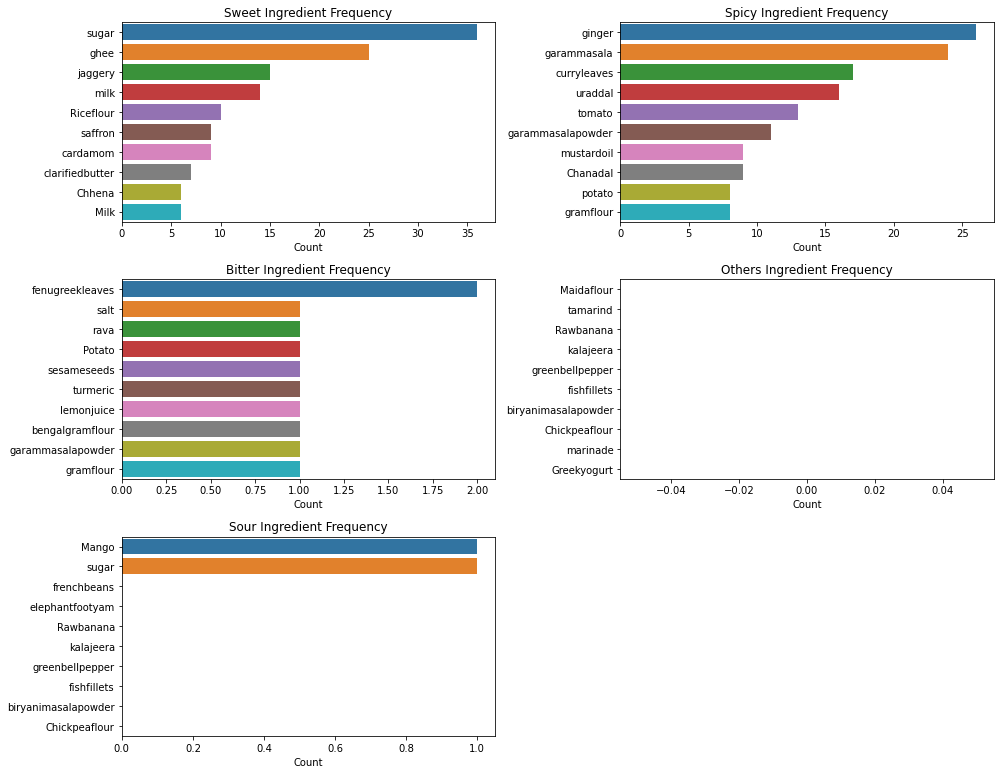

In [18]:
plt.figure(figsize=(14,14))

for n, flavor in enumerate(ing_per_flavor.columns):
    ordered = ing_per_flavor.sort_values([flavor], ascending=False)[0:10]
    plt.subplot(4, 2, n+1)
    sns.barplot(x=ordered[flavor], y=ordered.index)
    plt.xlabel('Count')
    plt.title(f'{flavor} Ingredient Frequency')
    
plt.tight_layout()
plt.show()

Here sweet dishes are mainly made out of sugar, ghee and jaggery so we can conclude most of the indian sweets are buttery sweet treats.

Surprisingly ginger is the main component for spicy dishes with garam masalas whereas I always thought red chilli would be the main reason for spicyness in Indian food because Indian food is always famous for hotness and red colour.

In [19]:
#adding extra column as total time(Prep time + Cook time)

df['Total_time'] = df['prep_time']+ df['cook_time']

df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Total_time
0,Balu shahi,"[Maidaflour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"[Gramflour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North,75
3,Ghevar,"[Flour, ghee, kewra, milk, clarifiedbutter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45
4,Gulab jamun,"[Milkpowder, plainflour, bakingpowder, ghee, m...",vegetarian,15,40,sweet,dessert,West Bengal,East,55


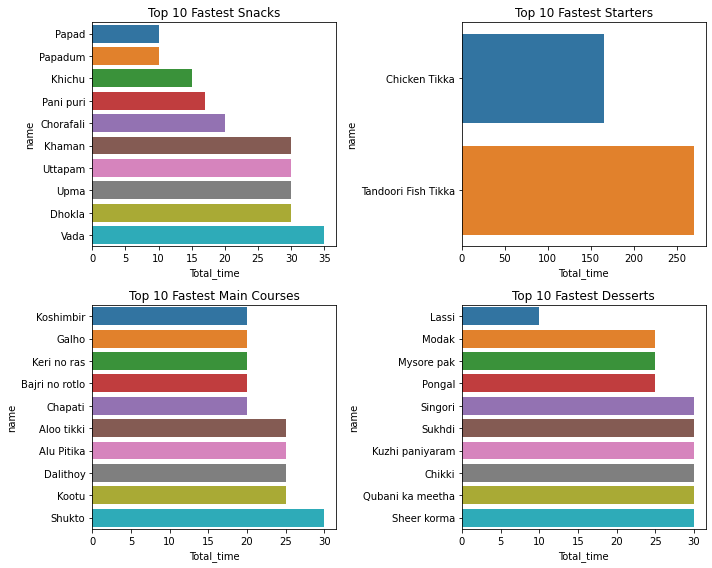

In [20]:

snack = df.loc[(df['Total_time'] != 0) & (df['course'] == 'snack')]
dessert = df.loc[(df['Total_time'] != 0) & (df['course'] == 'dessert')]
main = df.loc[(df['Total_time'] != 0) & (df['course'] == 'main course')]
starter = df.loc[(df['Total_time'] != 0) & (df['course'] == 'starter')]

fast_snacks = snack.sort_values(['Total_time'], ascending=True)[0:10]
fast_desserts = dessert.sort_values(['Total_time'], ascending=True)[0:10]
fast_main = main.sort_values(['Total_time'], ascending=True)[0:10]
fast_starter = starter.sort_values(['Total_time'], ascending=True)[0:10]

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.barplot(x=fast_snacks['Total_time'], y=fast_snacks['name'])
plt.title('Top 10 Fastest Snacks')

plt.subplot(2,2,2)
sns.barplot(x=fast_starter['Total_time'], y=fast_starter['name'])
plt.title('Top 10 Fastest Starters')

plt.subplot(2,2,3)
sns.barplot(x=fast_main['Total_time'], y=fast_main['name'])
plt.title('Top 10 Fastest Main Courses')

plt.subplot(2,2,4)
sns.barplot(x=fast_desserts['Total_time'], y=fast_desserts['name'])
plt.title('Top 10 Fastest Desserts')

plt.tight_layout()
plt.show()

As we can see here, there are only 2 dishes of starter in our dataset whereas we have a wide range of dishes which are easy to cook(in less time) in other categories.

